In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import ttest_ind, ks_2samp

# Display all columns
pd.set_option('display.max_columns', None)

In [2]:
# Load the stage 5b property data
df = pd.read_csv(r'Output Files\stage_5b_property_data.csv') 
df.head(3)

,Possession Status,Availability Starts From,Floor No,Commercial,Developer,Price (Crores),Landmark,Covered Area,Society,sqft Price (INR),Carpet Area,Locality,Unit of Carpet Area,Furnished Type,Bathrooms,Facing,Transaction Type,Type of Property,City,Bedrooms,Posted By,Total Floors,isPrimeLocationProperty,Unit of Covered Area,Property Lifespan,Balconies,Power Back Up,Lift,Rain Water Harvesting,Club House,Swimming Pool,Gymnasium,Park,Parking,Security,Water Storage,Private Terrace/Garden,Vaastu Compliant,Service/Goods Lift,Air Conditioned,Visitor Parking,Intercom Facility,Maintenance Staff,Waste Disposal,Laundry Service,Internet/Wi-Fi Connectivity,DTH Television Facility,RO Water System,Banquet Hall,Bar/Lounge,Cafeteria/Food Court,Conference Room,Piped Gas,Jogging and Strolling Track,Outdoor Tennis Courts,Mansion,Downtown,Skyline View,Wrap Around Balcony,Island Kitchen Layout,Full Glass Wall,House help accommodation,Concierge Services,Garden View,Marble flooring,Well Furnished,Modular Kitchen,Helipad,Private pool,Private Jaccuzi,Mini Cinema Theatre,Golf Course,Infinity Swimming Pool,Pool with temperature control,Sea facing,Skydeck,Earth quake resistant,Theme based Architectures,Health club with Steam / Jaccuzi,Large Clubhouse,Large Open space,Fingerprint Access,Grand Entrance lobby,Private Garage,Fireplace,Wine Cellar,Sky Villa,Water Front,Hilltop,Smart Home,Barbeque space,Kids play area,Library,Puja Room,Study,House Help Room,Store Room,Aerobics Room,Canopy Walk,Coffee Lounge & Restaurants,Dance Studio,Event Space & Amphitheatre,Flower Gardens,Guest Accommodation,Indoor Squash & Badminton Courts,Kids Play Area,Kids Play Pool With Water Slides,Library And Business Centre,Meditation Area,Multipurpose Courts,Recreational Pool,Rentable CommuniPfty Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,latitude,longitude,geocoded_address,Area,Price_bin,Floor Level,dist_to_csia_airport_km,dist_to_thane_station_km,dist_to_andheri_station_km,dist_to_csmt_station_km,dist_to_nariman_point_km,dist_to_andheri_east_comm_km,dist_to_marine_drive_km,dist_to_navi_mumbai_airport_km,dist_to_vashi_station_km,dist_to_sanjay_gandhi_np_km,dist_to_phoenix_mall_kurla_km,dist_to_kokilaben_hospital_km,dist_to_dh_ambani_school_km
0,Ready to Move,Immediately,20.0,Y,Tata Housing Development Company Ltd.,0.63,Rajoli naka,763.571943,Tata Amantra,8250.696031,579.0,Kalyan West,Sq-ft,Unfurnished,2.0,East,New Property,Apartment,Thane,2,Agent,34.0,Y,Sq-ft,New construction,2.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19.240353,73.125279,"Kalyan West, Kalyan-Dombivli, Kalyan Taluka, T...",Kalyan West,Low,High rise (> 10),32.01,16.86,32.22,45.19,47.27,31.16,45.7,30.01,23.31,27.87,30.9,33.78,34.33
1,Ready to Move,Immediately,18.0,N,Sai Satyam Developers,0.54,This property has reputed scholl ints vicinity.,850.000000,Sai Satyam Homes,6352.000000,585.0,Kalyan West,Sq-ft,Unfurnished,2.0,East,New Property,Apartment,Thane,2,Agent,18.0,Y,Sq-ft,New construction,2.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19.240353,73.125279,"Kalyan West, Kalyan-Dombivli, Kalyan Taluka, T...",Kalyan West,Low,High rise (> 10),32.01,16.86,32.22,45.19,47.27,31.16,45.7,30.01,23.31,27.87,30.9,33.78,34.33
2,Under Construction,Dec 25,5.0,N,Birla Estates,0.90,Shahad is one of the attractive locations to o...,1050.000000,Birla Vanya,8571.000000,815.0,Kalyan West,Sq-ft,Unfurnished,2.0,East,New Property,Apartment,Thane,2,Agent,27.0,Y,Sq-ft,Less than 5 years,3.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19.240353,73.125279,"Kaly

In [3]:
# Check shape
df.shape

(6280, 135)

In [5]:
# Info
pd.set_option('display.max_info_columns', 200)
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6280 entries, 0 to 6279
Data columns (total 135 columns):
 #    Column                                   Non-Null Count  Dtype  
---   ------                                   --------------  -----  
 0    Possession Status                        6280 non-null   object 
 1    Availability Starts From                 6280 non-null   object 
 2    Floor No                                 6280 non-null   float64
 3    Commercial                               6280 non-null   object 
 4    Developer                                6280 non-null   object 
 5    Price (Crores)                           6280 non-null   float64
 6    Landmark                                 6280 non-null   object 
 7    Covered Area                             6280 non-null   float64
 8    Society                                  6280 non-null   object 
 9    sqft Price (INR)                         6280 non-null   float64
 10   Carpet Area                       

# <b>Feature Selection</b>

For Price predictive model we do not require:
- Possession Status
- Availability Starts From
- Floor No
- Developer
- Landmark
- Society
- sqft Price (INR)
- Carpet Area
- Locality
- Unit of Carpet Area
- Well Furnished
- Posted By
- Total Floors
- isPrimeLocationProperty
- Unit of Covered Area
- latitude
- longitude
- geocoded_address
- Price_bin

In [8]:
# Filter out non-essential features to construct training data for predicting Price 
training_data = df.drop(columns=['Possession Status', 'Availability Starts From', 'Floor No', 'Developer', 'Landmark', 'Society', 'sqft Price (INR)', 'Carpet Area', 'Locality', 'Unit of Carpet Area', \
                 'Well Furnished', 'Posted By', 'Total Floors', 'isPrimeLocationProperty', 'Unit of Covered Area', 'latitude', 'longitude', 'geocoded_address', 'Price_bin'])

# Sample
training_data.sample(4)

,Commercial,Price (Crores),Covered Area,Furnished Type,Bathrooms,Facing,Transaction Type,Type of Property,City,Bedrooms,Property Lifespan,Balconies,Power Back Up,Lift,Rain Water Harvesting,Club House,Swimming Pool,Gymnasium,Park,Parking,Security,Water Storage,Private Terrace/Garden,Vaastu Compliant,Service/Goods Lift,Air Conditioned,Visitor Parking,Intercom Facility,Maintenance Staff,Waste Disposal,Laundry Service,Internet/Wi-Fi Connectivity,DTH Television Facility,RO Water System,Banquet Hall,Bar/Lounge,Cafeteria/Food Court,Conference Room,Piped Gas,Jogging and Strolling Track,Outdoor Tennis Courts,Mansion,Downtown,Skyline View,Wrap Around Balcony,Island Kitchen Layout,Full Glass Wall,House help accommodation,Concierge Services,Garden View,Marble flooring,Modular Kitchen,Helipad,Private pool,Private Jaccuzi,Mini Cinema Theatre,Golf Course,Infinity Swimming Pool,Pool with temperature control,Sea facing,Skydeck,Earth quake resistant,Theme based Architectures,Health club with Steam / Jaccuzi,Large Clubhouse,Large Open space,Fingerprint Access,Grand Entrance lobby,Private Garage,Fireplace,Wine Cellar,Sky Villa,Water Front,Hilltop,Smart Home,Barbeque space,Kids play area,Library,Puja Room,Study,House Help Room,Store Room,Aerobics Room,Canopy Walk,Coffee Lounge & Restaurants,Dance Studio,Event Space & Amphitheatre,Flower Gardens,Guest Accommodation,Indoor Squash & Badminton Courts,Kids Play Area,Kids Play Pool With Water Slides,Library And Business Centre,Meditation Area,Multipurpose Courts,Recreational Pool,Rentable CommuniPfty Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,Area,Floor Level,dist_to_csia_airport_km,dist_to_thane_station_km,dist_to_andheri_station_km,dist_to_csmt_station_km,dist_to_nariman_point_km,dist_to_andheri_east_comm_km,dist_to_marine_drive_km,dist_to_navi_mumbai_airport_km,dist_to_vashi_station_km,dist_to_sanjay_gandhi_np_km,dist_to_phoenix_mall_kurla_km,dist_to_kokilaben_hospital_km,dist_to_dh_ambani_school_km
5318,N,1.0500,600.0,Semi-Furnished,2.0,East,Resale,Apartment,Mumbai,1,10 to 15 years,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,Kandivali East,High rise (> 10),13.02,10.69,10.11,29.90,31.66,10.30,29.70,31.11,20.02,3.12,14.07,10.74,16.35
5786,N,3.1600,1024.0,Furnished,2.0,West,Resale,Apartment,Mumbai,2,10 to 15 years,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,Oshiwara,Mid rise (5 to 10),7.62,16.09,3.72,23.13,24.68,5.01,22.72,29.92,20.01,9.73,9.67,3.12,10.36
1136,N,0.4500,625.0,Semi-Furnished,2.0,North,Resale,Apartment,Mumbai,1,10 to 15 years,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Virar West,Low rise (< 5),3.87,18.35,7.58,13.26,15.16,6.73,13.25,20.76,13.66,19.48,3.24,8.32,1.12
136,N,0.3699,640.0,Unfurnished,1.0,North-East,New Property,Apartment,Thane,1,5 to 10 years,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,Kalyan East,Mid rise (5 to 10),31.95,17.12,32.35,44.68,46.77,31.24,45.23,28.88,22.63,28.59,30.74,33.94,34.15


#### Categorical columns encoding:

Feature selection techniques can’t work directly with raw categorical/text data, they need numbers. Encoding transforms categories into numeric representations so the model can process them.

In [9]:
# Import Ordinal encoder for Label encoding
from sklearn.preprocessing import OrdinalEncoder

# Define the order for each column that has a meaningful sequence
ordered_categories = {
    'Furnished Type': [
        ['Unfurnished', 'Semi-Furnished', 'Furnished']
    ],
    'Balconies': [
        ['1.0', '2.0', '3.0', '3+']
    ],
    'Floor Level': [
        ['Low rise (< 5)', 'Mid rise (5 to 10)', 'High rise (> 10)']
    ],
    'Property Lifespan': [
        ['New construction', 'Less than 5 years', '5 to 10 years',
         '10 to 15 years', '15 to 20 years', 'Above 20 years']
    ]
}

# Copy data
data = training_data.copy()

# Loop over categorical columns
for col in data.select_dtypes(include=['object']).columns:
    if col in ordered_categories:
        oe = OrdinalEncoder(categories=ordered_categories[col])
    else:
        oe = OrdinalEncoder()
    data[col] = oe.fit_transform(data[[col]])

# Encoded data
data_encoded = data.copy()

# Split dependant and independent features
X_label = data.drop('Price (Crores)', axis=1)
y_label = data['Price (Crores)']

Note:
- Label encoding works for features/ categories having a natural order (ordinal data). For nominal (unordered) categories like City, Area, Facing etc., label encoded numeric codes introduces false order and fake numerical relationships which can mislead 'Linear models'. Hence, Feature importance results for nominal categorical features from Linear model feature selection techniques will not be reliable.

- Nominal data + Ordinal encoding = Fake continuity:
    - Thane-> 0 and Mumbai-> 1 , a linear model will interpret these numbers as if Mumbai is '1 unit farther' from Thane. 
    - So with ordinal encoding, they treat the encoded integers like continuous values, which biases the coefficients making them misleading and unreliable for feature importance.

- Feature importance results from Tree-based feature importance techniques would be reliable for all features as they make cut in the data based on information gain or variance reduction and not on geometric distance between the points. They don’t care if a feature is nominal, ordinal, or numeric — they simply find thresholds (or category groupings) that best split the target variable.

In [10]:
# Categorical columns with no ordered sequence
categorical_features_unordered = ['City', 'Area', 'Transaction Type', 'Type of Property', 'Facing', 'Commercial']

In [11]:
# Independant features
X_label

,Commercial,Covered Area,Furnished Type,Bathrooms,Facing,Transaction Type,Type of Property,City,Bedrooms,Property Lifespan,Balconies,Power Back Up,Lift,Rain Water Harvesting,Club House,Swimming Pool,Gymnasium,Park,Parking,Security,Water Storage,Private Terrace/Garden,Vaastu Compliant,Service/Goods Lift,Air Conditioned,Visitor Parking,Intercom Facility,Maintenance Staff,Waste Disposal,Laundry Service,Internet/Wi-Fi Connectivity,DTH Television Facility,RO Water System,Banquet Hall,Bar/Lounge,Cafeteria/Food Court,Conference Room,Piped Gas,Jogging and Strolling Track,Outdoor Tennis Courts,Mansion,Downtown,Skyline View,Wrap Around Balcony,Island Kitchen Layout,Full Glass Wall,House help accommodation,Concierge Services,Garden View,Marble flooring,Modular Kitchen,Helipad,Private pool,Private Jaccuzi,Mini Cinema Theatre,Golf Course,Infinity Swimming Pool,Pool with temperature control,Sea facing,Skydeck,Earth quake resistant,Theme based Architectures,Health club with Steam / Jaccuzi,Large Clubhouse,Large Open space,Fingerprint Access,Grand Entrance lobby,Private Garage,Fireplace,Wine Cellar,Sky Villa,Water Front,Hilltop,Smart Home,Barbeque space,Kids play area,Library,Puja Room,Study,House Help Room,Store Room,Aerobics Room,Canopy Walk,Coffee Lounge & Restaurants,Dance Studio,Event Space & Amphitheatre,Flower Gardens,Guest Accommodation,Indoor Squash & Badminton Courts,Kids Play Area,Kids Play Pool With Water Slides,Library And Business Centre,Meditation Area,Multipurpose Courts,Recreational Pool,Rentable CommuniPfty Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,Area,Floor Level,dist_to_csia_airport_km,dist_to_thane_station_km,dist_to_andheri_station_km,dist_to_csmt_station_km,dist_to_nariman_point_km,dist_to_andheri_east_comm_km,dist_to_marine_drive_km,dist_to_navi_mumbai_airport_km,dist_to_vashi_station_km,dist_to_sanjay_gandhi_np_km,dist_to_phoenix_mall_kurla_km,dist_to_kokilaben_hospital_km,dist_to_dh_ambani_school_km
0,1.0,763.571943,0.0,2.0,0.0,0.0,0.0,1.0,2,0.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19.0,2.0,32.01,16.86,32.22,45.19,47.27,31.16,45.7,30.01,23.31,27.87,30.90,33.78,34.33
1,0.0,850.000000,0.0,2.0,0.0,0.0,0.0,1.0,2,0.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19.0,2.0,32.01,16.86,32.22,45.19,47.27,31.16,45.7,30.01,23.31,27.87,30.90,33.78,34.33
2,0.0,1050.000000,0.0,2.0,0.0,0.0,0.0,1.0,2,1.0,2.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19.0,1.0,32.01,16.86,32.22,45.19,47.27,31.16,45.7,30.01,23.31,27.87,30.90,33.78,34.33
3,1.0,561.000000,1.0,2.0,0.0,0.0,0.0,1.0,1,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19.0,1.0,32.01,16.86,32.22,45.19,47.27,31.16,45.7,30.01,23.31,27.87,30.90,33.78,34.33
4,0.0,1067.000000,0.0,2.0,2.0,0.0,0.0,1.0,2,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19.0,2.0,32.01,16.86,32.22,45.19,47.27,31.16,45.7,30.01,23.31,27.87,30.90,33.78,34.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [12]:
# Dependant features
y_label

0       0.630000
1       0.540000
2       0.900000
3       0.495000
4       0.657000
          ...   
6275    1.460000
6276    1.100000
6277    2.092263
6278    1.870966
6279    1.850000
Name: Price (Crores), Length: 6280, dtype: float64

-------------

#### Utilities

In [21]:
def feature_importance_visualization(table: pd.DataFrame, strategy: str):
    '''
    Plots Feature Importance table and Lollipop chart side by side

    Args:
    table (pd.DataFrame): Feature Importance dataframe
    strategy (str): Method used to deduce Feature Importances
    '''
    df_sub = table.copy()

    # Get Feature Importance column name
    Feature_Importance = table.columns[1]

    # Sort from weakest to strongest Importance based on absolute values
    df_sub = df_sub.reindex(df_sub[Feature_Importance].abs().sort_values().index)

    norm = plt.Normalize(df_sub[Feature_Importance].abs().min(), df_sub[Feature_Importance].abs().max())
    colors = plt.cm.coolwarm(norm(df_sub[Feature_Importance].abs()))

    # Create figure and two subplots side by side with width ratio
    fig, (ax_table, ax_plot) = plt.subplots(1, 2, figsize=(18, 8), gridspec_kw={'width_ratios': [1, 1.5]})

    # Plot lollipop chart in ax_plot
    ax_plot.hlines(y=df_sub['Features'], xmin=0, xmax=df_sub[Feature_Importance].abs(), color='black')
    scatter = ax_plot.scatter(df_sub[Feature_Importance].abs(), df_sub['Features'], c=colors, s=100, edgecolor='black')
    ax_plot.axvline(0, color='grey', linewidth=1, linestyle='--')
    ax_plot.set_title(f'Feature Importance ({strategy})', fontsize=14, weight='bold')
    ax_plot.set_xlabel('Feature Importance')
    ax_plot.set_ylabel('Features')

    # Remove axis from table plot
    ax_table.axis('off')

    # Prepare table data for display
    table_data = df_sub.copy()
    table_data['Feature Importance'] = table_data[Feature_Importance].round(3)

    # Drop original column from table_data
    table_data.drop(columns=[Feature_Importance], inplace=True)

    # Add table to ax_table
    table = ax_table.table(cellText=table_data.values,
                        colLabels=table_data.columns,
                        cellLoc='center',
                        colLoc='center',
                        loc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(12)

    # Adjust row height
    table.scale(1, 2)

    plt.tight_layout()
    plt.show()

------------

### Strategy 1: Correlation Feature Importance

In [14]:
# Correlation wrt Price
FI_correlation = data_encoded.corr()['Price (Crores)'].sort_values(ascending=False)

# Convert to dataframe
FI_correlation = FI_correlation.iloc[1:].to_frame().reset_index().rename(columns={'index':'Features','Price (Crores)':'FI_corr'})

# Display
FI_correlation.style.background_gradient(cmap='coolwarm', subset=['FI_corr'])

,Features,FI_corr
0,Covered Area,0.857397
1,Bathrooms,0.758753
2,Bedrooms,0.739477
3,dist_to_thane_station_km,0.343918
4,Puja Room,0.242647
5,House help accommodation,0.241578
6,Skydeck,0.241535
7,Private Garage,0.241357
8,Sea facing,0.240684
9,Marble flooring,0.240584


Visualize:

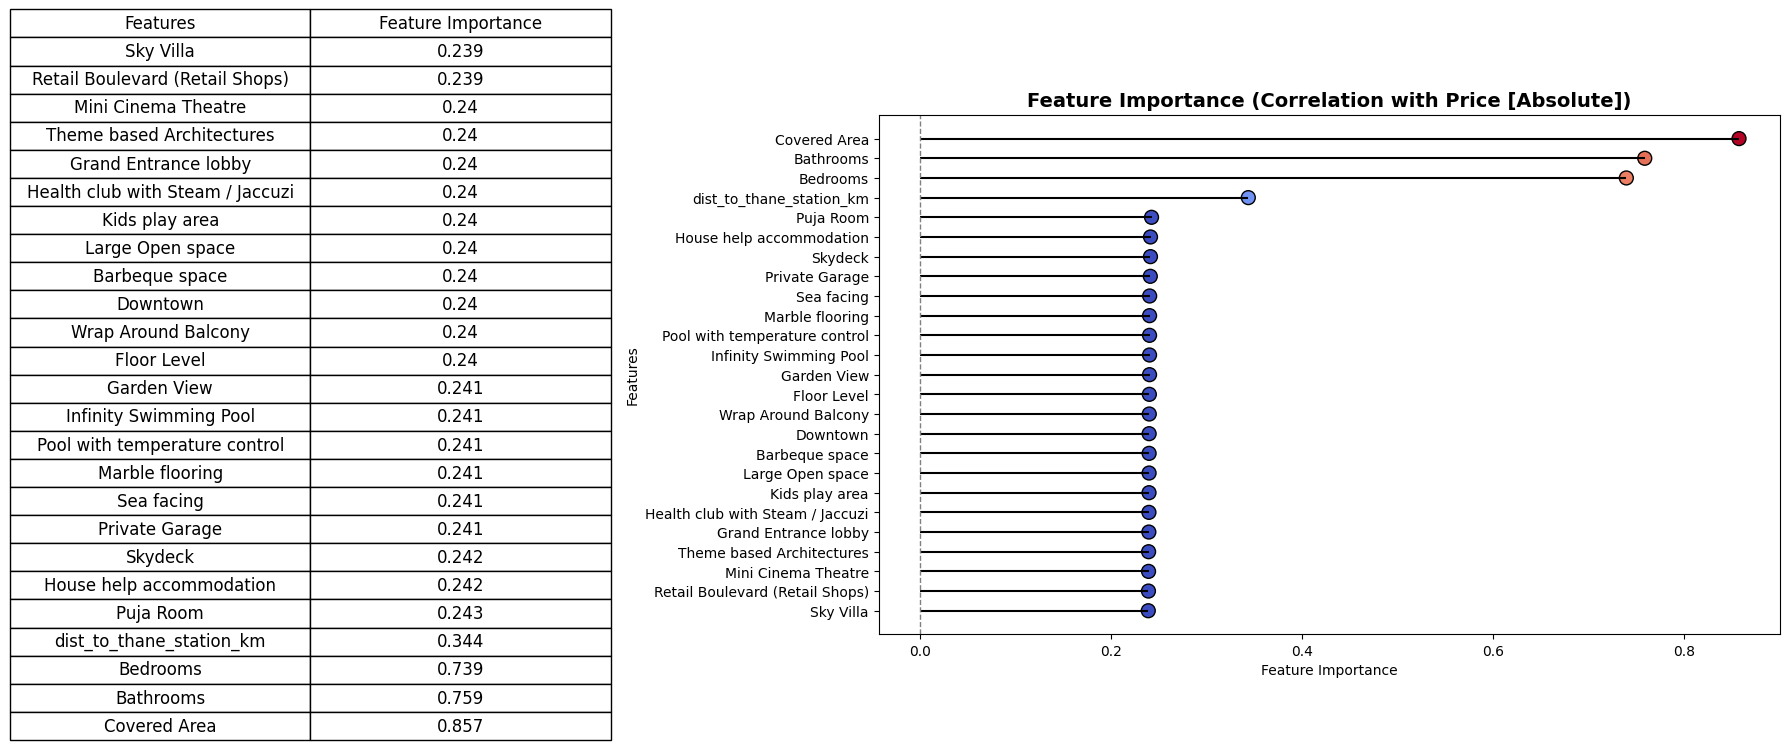

In [22]:
# Top 25
feature_importance_visualization(FI_correlation[:25], 'Correlation with Price [Absolute]')

-----------------

### Strategy 2: Random Forest Feature Importance

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_label, y_label)

# Extract feature importance scores for label encoded data and make dataframe
FI_random_forest = pd.DataFrame({
    'Features': X_label.columns,
    'FI_Randomforest': rf_regressor.feature_importances_
}).sort_values(by='FI_Randomforest', ascending=False)

# Display
FI_random_forest.reset_index(drop=True).style.background_gradient(cmap='coolwarm', subset=['FI_Randomforest'])

,Features,FI_Randomforest
0,Covered Area,0.749362
1,dist_to_thane_station_km,0.059441
2,Bedrooms,0.031367
3,Area,0.018617
4,dist_to_navi_mumbai_airport_km,0.010549
5,dist_to_marine_drive_km,0.010356
6,dist_to_dh_ambani_school_km,0.010115
7,dist_to_nariman_point_km,0.009514
8,Bathrooms,0.009227
9,dist_to_sanjay_gandhi_np_km,0.009162


Visualize:

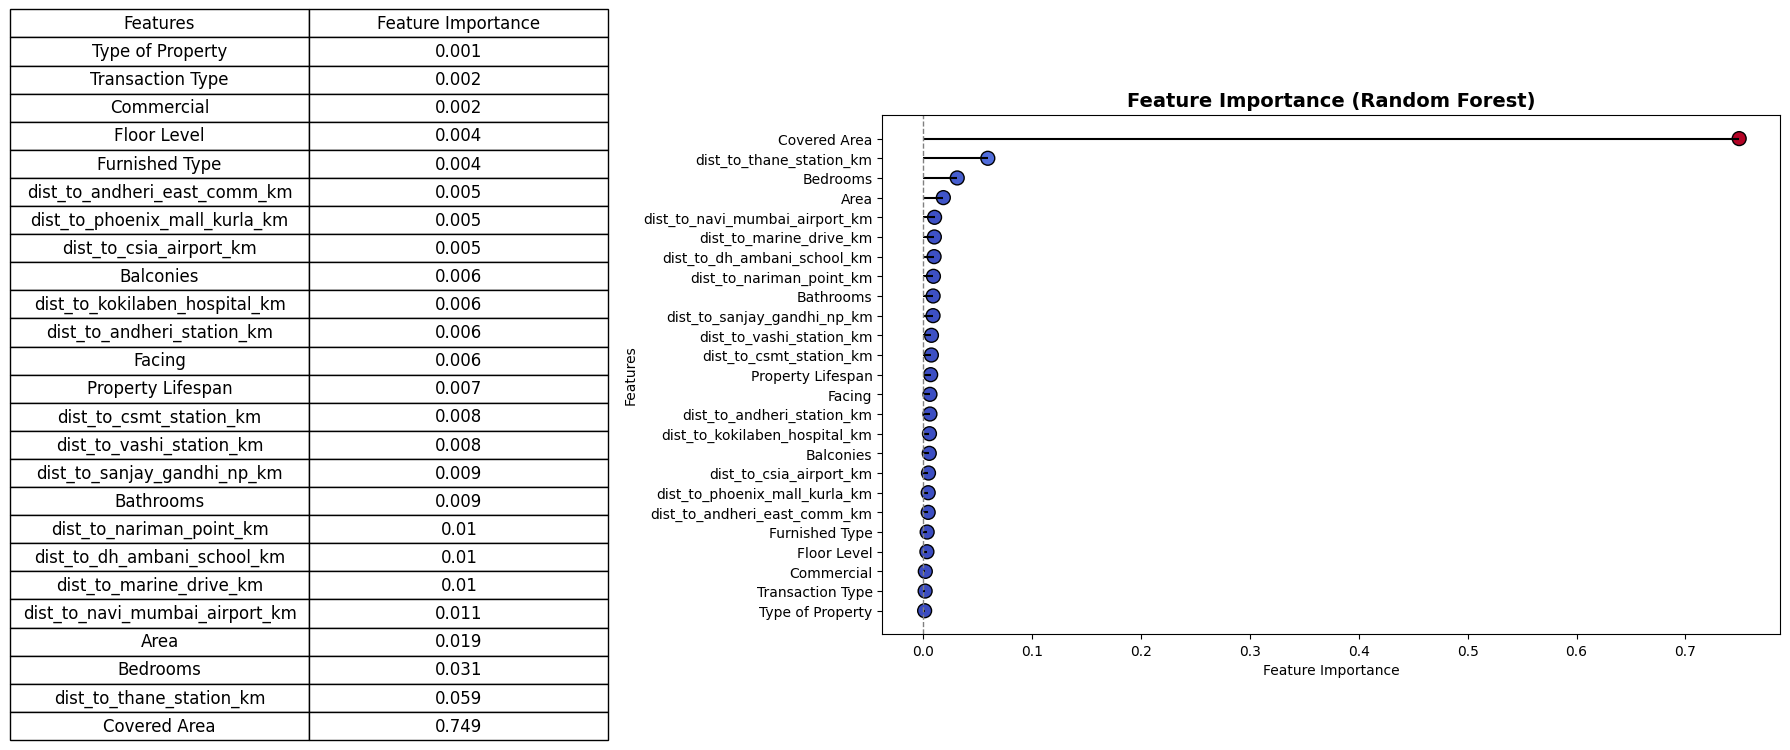

In [29]:
# Top 25
feature_importance_visualization(FI_random_forest[:25], 'Random Forest')

Observation: \
Area and City has now moved to the top of Feature Importance chart. Here we deployed feature importance using tree based models that makes cut in the data rather then depending upon distance metric, hence the results is reliable for all the features.

--------------

### Strategy 3: Gradient Boosting Feature Importance

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting regressor on label encoded data
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
FI_gradient_boosting = pd.DataFrame({
    'Features': X_label.columns,
    'FI_Gradientboosting': gb_regressor.feature_importances_
}).sort_values(by='FI_Gradientboosting', ascending=False)

# Display
FI_gradient_boosting.reset_index(drop=True).style.background_gradient(cmap='coolwarm', subset=['FI_Gradientboosting'])

,Features,FI_Gradientboosting
0,Covered Area,0.679226
1,Bathrooms,0.084528
2,dist_to_thane_station_km,0.061919
3,Bedrooms,0.058732
4,dist_to_sanjay_gandhi_np_km,0.016296
5,dist_to_phoenix_mall_kurla_km,0.015014
6,Area,0.011542
7,dist_to_nariman_point_km,0.010970
8,dist_to_csia_airport_km,0.009631
9,dist_to_navi_mumbai_airport_km,0.009429


Visualize

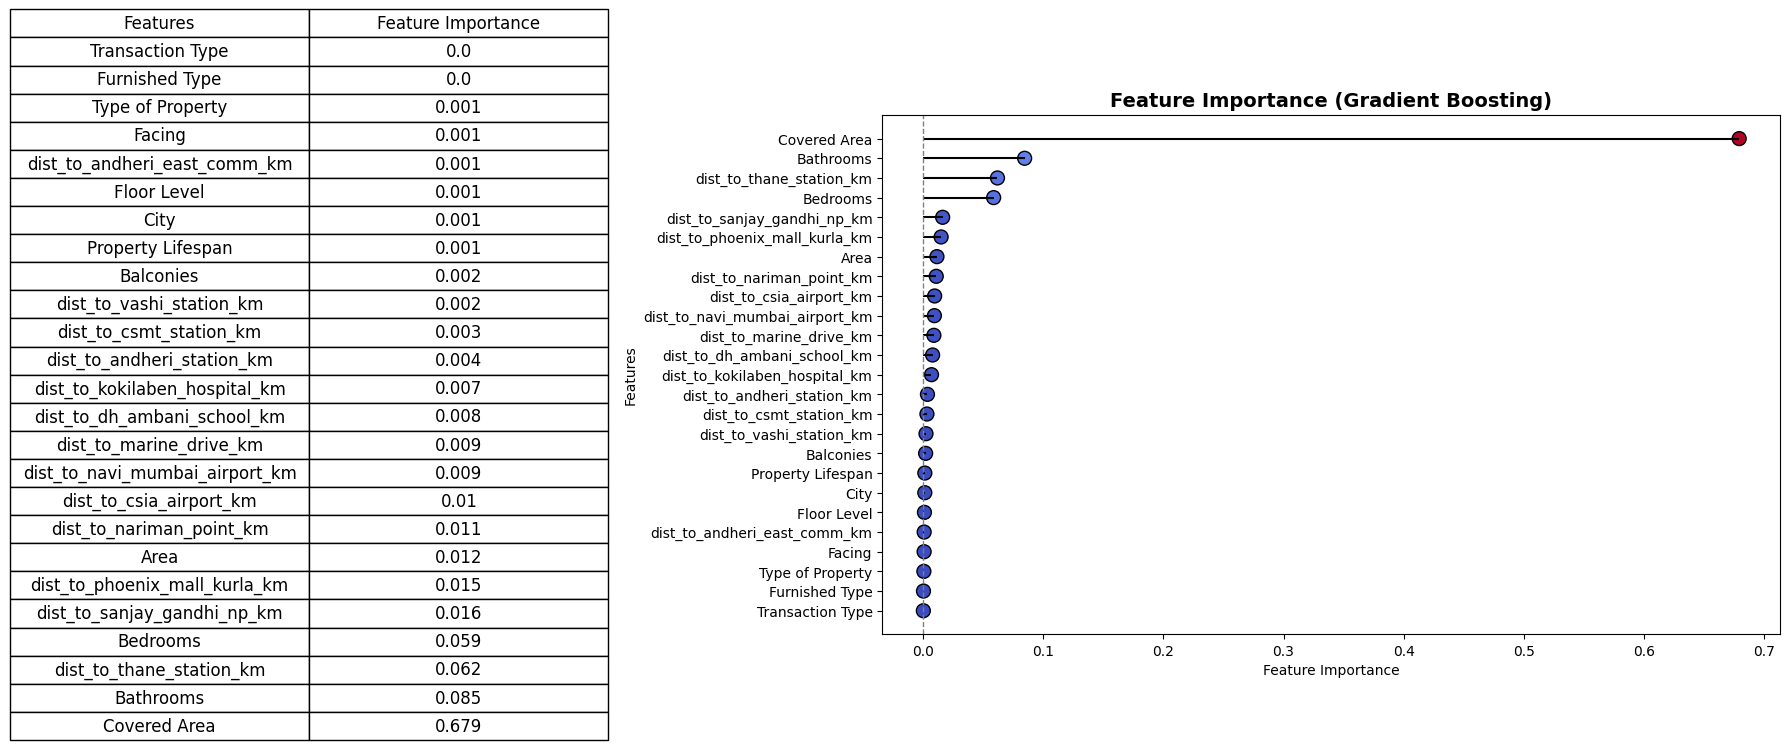

In [32]:
# Top 25
feature_importance_visualization(FI_gradient_boosting[:25], 'Gradient Boosting')

-----------------

### Strategy 4: Permutation Importance

In [33]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
permutation_importance = permutation_importance(rf_regressor, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
FI_permutation_importance = pd.DataFrame({
    'Features': X_label.columns,
    'FI_Permutation': permutation_importance.importances_mean
}).sort_values(by='FI_Permutation', ascending=False)

# Display
FI_permutation_importance.reset_index(drop=True).style.background_gradient(cmap='coolwarm', subset=['FI_Permutation'])

,Features,FI_Permutation
0,Covered Area,0.822569
1,dist_to_thane_station_km,0.072601
2,Bedrooms,0.037161
3,Area,0.014474
4,dist_to_marine_drive_km,0.008198
5,Bathrooms,0.007882
6,dist_to_navi_mumbai_airport_km,0.007607
7,dist_to_nariman_point_km,0.006654
8,dist_to_sanjay_gandhi_np_km,0.004852
9,dist_to_csmt_station_km,0.004627


Visualize

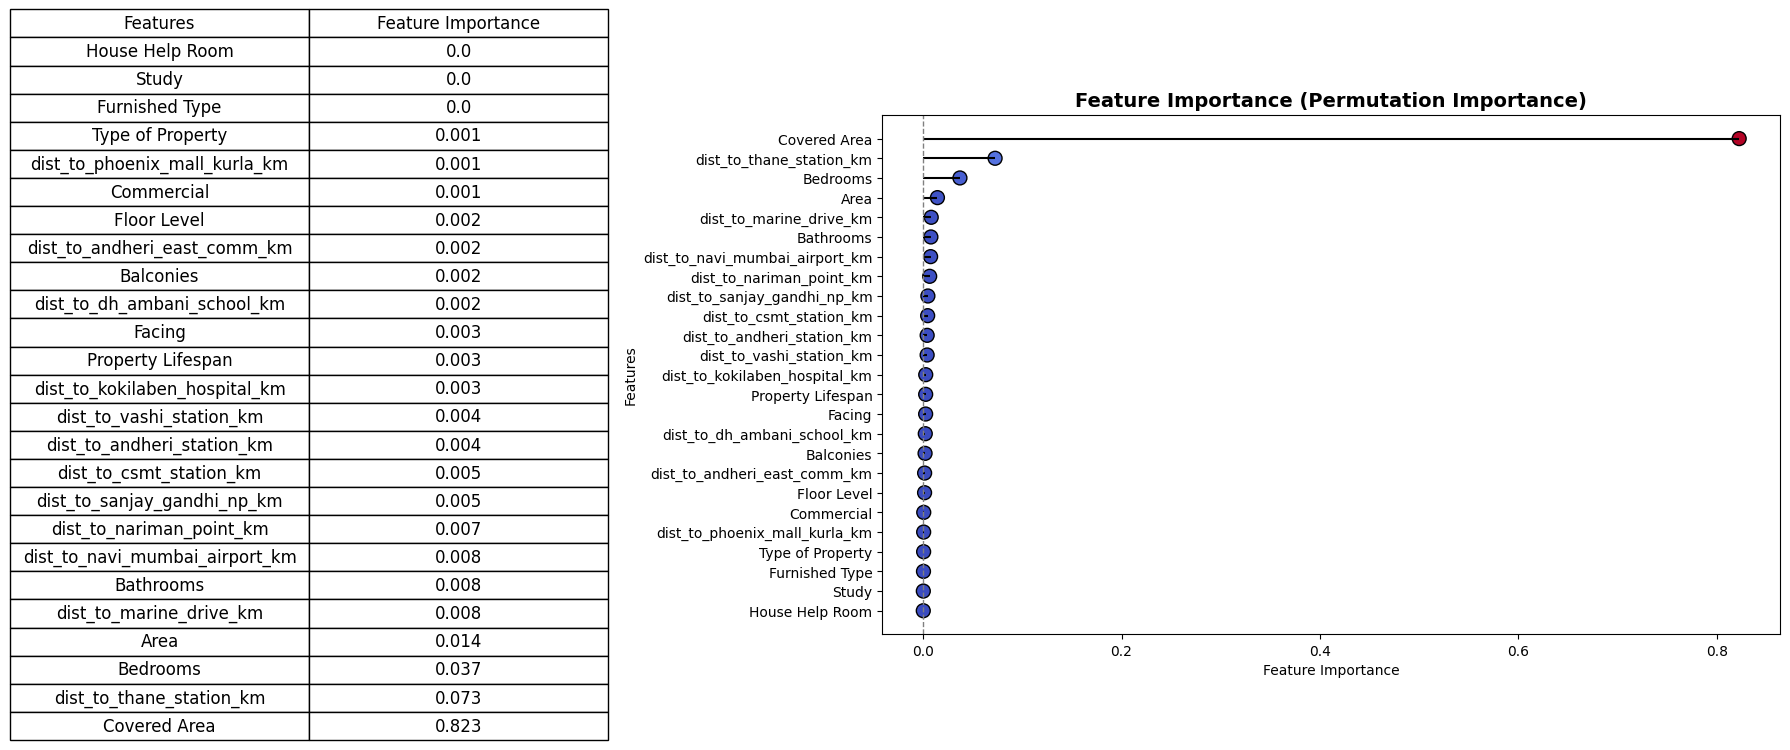

In [34]:
# Top 25
feature_importance_visualization(FI_permutation_importance[:25], 'Permutation Importance')

------------------

### Strategy 5: LASSO Regression
-  Note that here we are using linear model for feature importance. Feature importance results for nominal categorical columns (with no inherent ordering/ ranking) like Area and City using linear model won't be that reliable here because we had ordinal encoded the categorical columns of our dataset which introduced ordering.

-  In previous methods feature importance using tree based models were reliable because they make cut in the data.

-  For feature selection using linear models to be reliable we should have rather done one hot encoding (tree based model based feature selection also works with one hot encoding).

In [35]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# Using relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract the coefficients
FI_LASSO = pd.DataFrame({
    'Features': X_label.columns,
    'FI_Lasso': lasso.coef_
}).sort_values(by='FI_Lasso', ascending=False)

# Display
FI_LASSO.reset_index(drop=True).style.background_gradient(cmap='coolwarm', subset=['FI_Lasso'])

,Features,FI_Lasso
0,Covered Area,2.037522
1,Bathrooms,0.455529
2,dist_to_vashi_station_km,0.393937
3,dist_to_sanjay_gandhi_np_km,0.205556
4,City,0.114680
5,Facing,0.112977
6,Puja Room,0.099817
7,Store Room,0.096971
8,Property Lifespan,0.080746
9,Commercial,0.080589


- As expected Area is down the in the list of Feature Importance as we used a linear model here that depends on distance metric. [Unreliable results for nominal categorical features]

- Feature importance results using linear models for ordinally encoded nominal categorical features is not reliable as linear models uses distance metric and ordinal encoding brings in ordering in nominal categorical features that did not existed inherently.

Visualize:

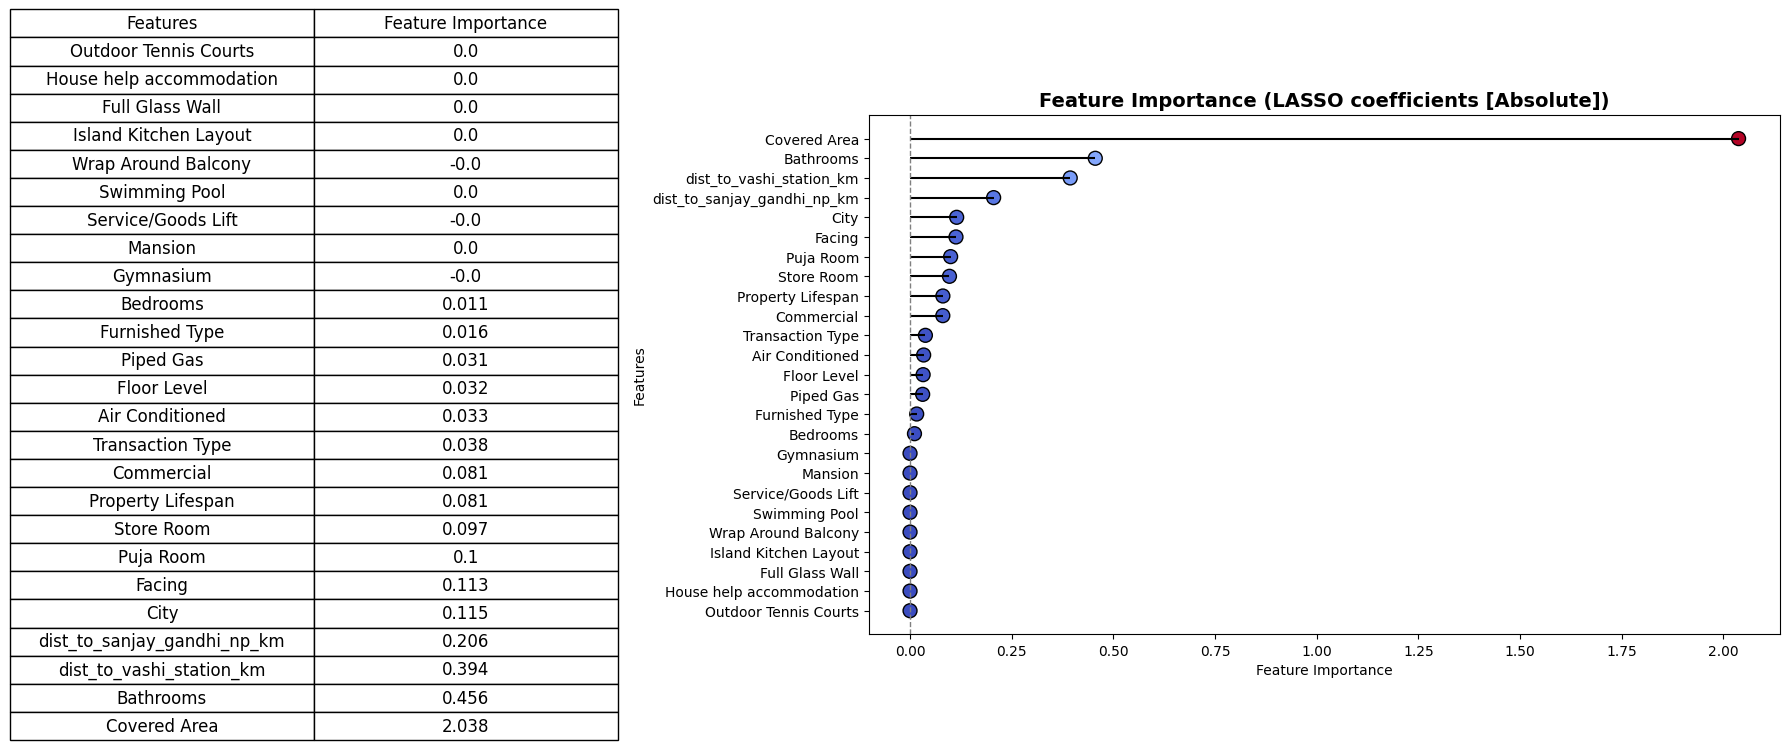

In [37]:
# Top 25
feature_importance_visualization(FI_LASSO[:25], 'LASSO coefficients [Absolute]')

---------------

### Strategy 6: RFE 'Recursive Feature Elimination'

In [38]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor(random_state=42)

# Apply RFE on the label-encoded training data (Standardization is not required for tree-based models like RandomForest)
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract feature importances for the selected features from the fitted RandomForestRegressor
selected_importances = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
FI_RFE = pd.DataFrame({
    'Features': selected_features,
    'FI_RFE': selected_importances
}).sort_values(by='FI_RFE', ascending=False)

# Display
FI_RFE.reset_index(drop=True).style.background_gradient(cmap='coolwarm', subset=['FI_RFE'])

,Features,FI_RFE
0,Covered Area,0.749362
1,dist_to_thane_station_km,0.059441
2,Bedrooms,0.031367
3,Area,0.018617
4,dist_to_navi_mumbai_airport_km,0.010549
5,dist_to_marine_drive_km,0.010356
6,dist_to_dh_ambani_school_km,0.010115
7,dist_to_nariman_point_km,0.009514
8,Bathrooms,0.009227
9,dist_to_sanjay_gandhi_np_km,0.009162


Visualize:

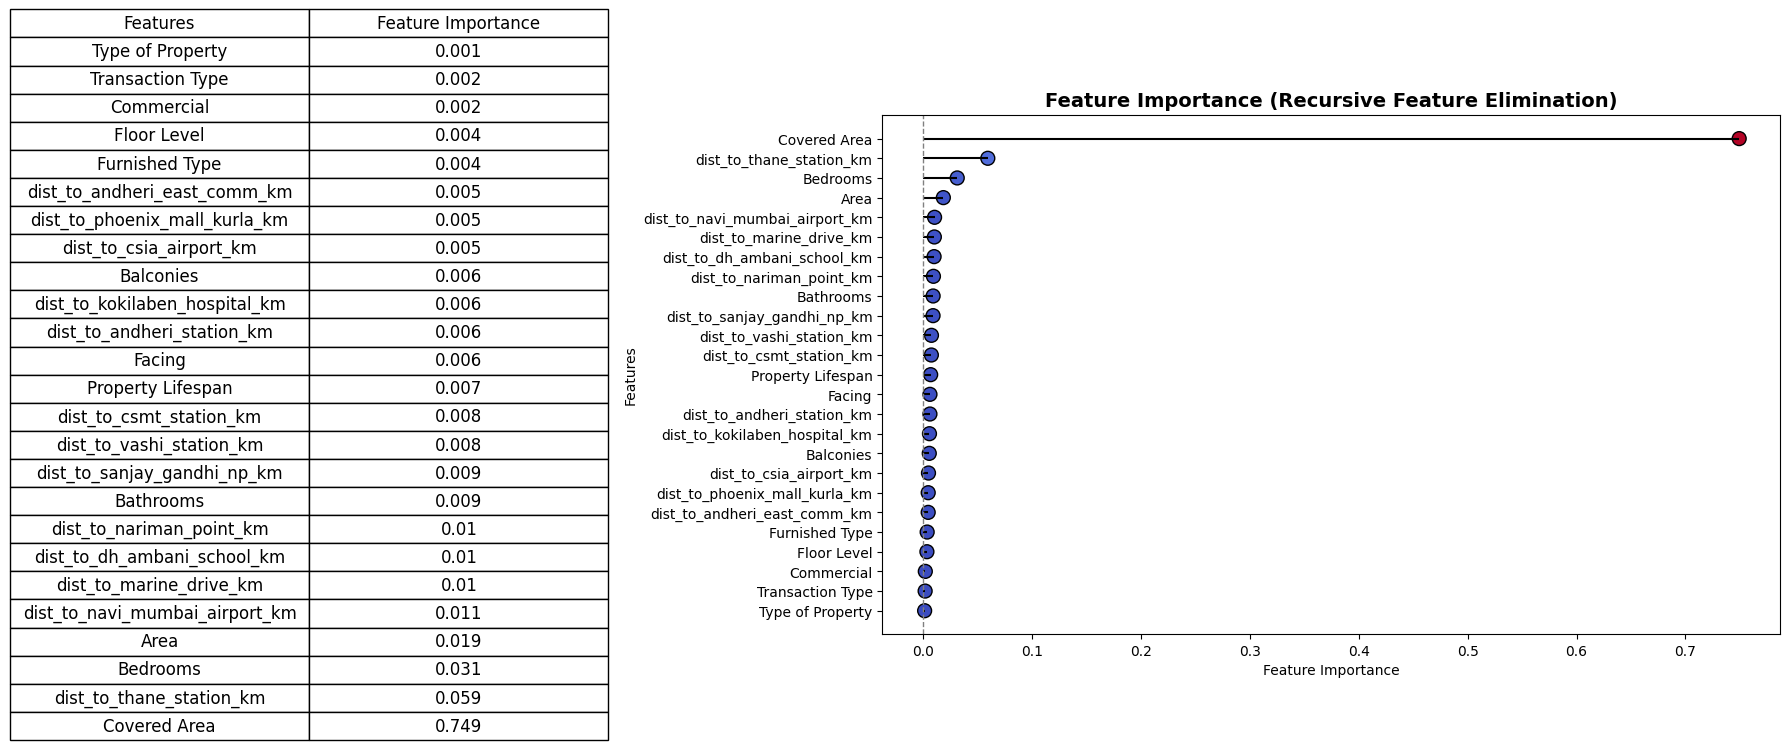

In [39]:
# Top 25
feature_importance_visualization(FI_RFE[:25], 'Recursive Feature Elimination')

--------------

### Strategy 7: Linear Regression Weights

In [40]:
# Train a linear regression model on the label-encoded and standardized training data (more weight means more importance)
from sklearn.linear_model import LinearRegression

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
FI_LR = pd.DataFrame({
    'Features': X_label.columns,
    'FI_LR': lin_reg.coef_
}).sort_values(by='FI_LR', ascending=False)

# Display
FI_LR.reset_index(drop=True).style.background_gradient(cmap='coolwarm', subset=['FI_LR'])

,Features,FI_LR
0,dist_to_nariman_point_km,68.346582
1,dist_to_csmt_station_km,24.364184
2,dist_to_phoenix_mall_kurla_km,8.455935
3,dist_to_andheri_station_km,3.821783
4,Covered Area,2.057904
5,dist_to_navi_mumbai_airport_km,1.887947
6,Pool with temperature control,1.148741
7,Infinity Swimming Pool,1.148741
8,dist_to_thane_station_km,0.712645
9,dist_to_sanjay_gandhi_np_km,0.631410


Visualize:

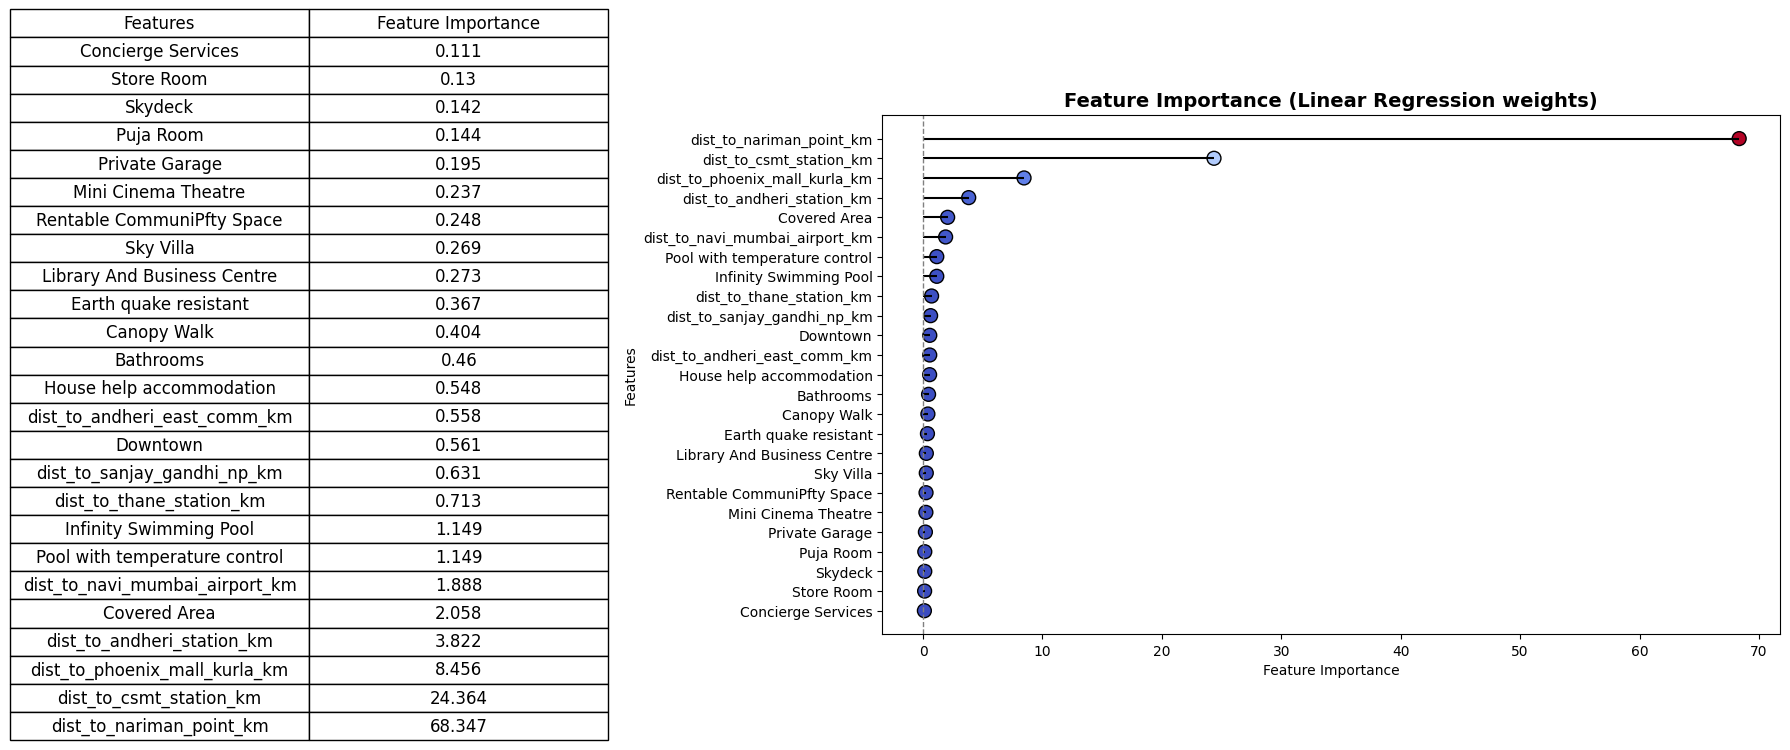

In [41]:
# Top 25
feature_importance_visualization(FI_LR[:25], 'Linear Regression weights')

Results are not reliable for nominal categorical features like Area and City as they were Ordinally encoded and we used a Linear feature importance model here.

------------

### Strategy 8: SHAP

In [42]:
import shap

# Compute SHAP values using the trained Random Forest model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf_regressor)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values

array([[ 1.64886698e-02, -1.11757629e+00, -6.73768880e-03, ...,
        -2.98173613e-02, -1.29322125e-01, -1.27459784e-01],
       [-3.93378340e-03, -1.00608525e+00, -5.65573960e-03, ...,
        -3.17213113e-02, -1.45827320e-01, -1.47501887e-01],
       [-4.29339950e-03, -7.99374418e-01, -5.66435066e-03, ...,
        -2.84193149e-02, -1.47748180e-01, -1.53333706e-01],
       ...,
       [ 1.12880236e-02, -8.38529790e-01, -3.50914194e-04, ...,
         1.37704084e-02,  4.27711167e-02,  4.19120340e-02],
       [ 2.32772189e-02, -9.07140233e-01, -4.71066510e-03, ...,
         1.13095786e-02,  5.61190527e-02,  4.63712421e-02],
       [ 3.05692852e-02, -1.04473831e+00, -8.06510920e-03, ...,
         1.16821395e-02,  5.81193474e-02,  5.02521031e-02]],
      shape=(6280, 115))

In [43]:
FI_SHAP = pd.DataFrame({
    'Features': X_label.columns,
    'FI_SHAP': np.abs(shap_values).mean(axis=0)
}).sort_values(by='FI_SHAP', ascending=False)

# Display
FI_SHAP.reset_index(drop=True).style.background_gradient(cmap='coolwarm', subset=['FI_SHAP'])

,Features,FI_SHAP
0,Covered Area,1.435746
1,dist_to_thane_station_km,0.328284
2,Bedrooms,0.279090
3,Area,0.088443
4,dist_to_andheri_station_km,0.083392
5,Bathrooms,0.060558
6,dist_to_sanjay_gandhi_np_km,0.058614
7,dist_to_dh_ambani_school_km,0.056151
8,dist_to_navi_mumbai_airport_km,0.051188
9,dist_to_kokilaben_hospital_km,0.045419


Visualize:

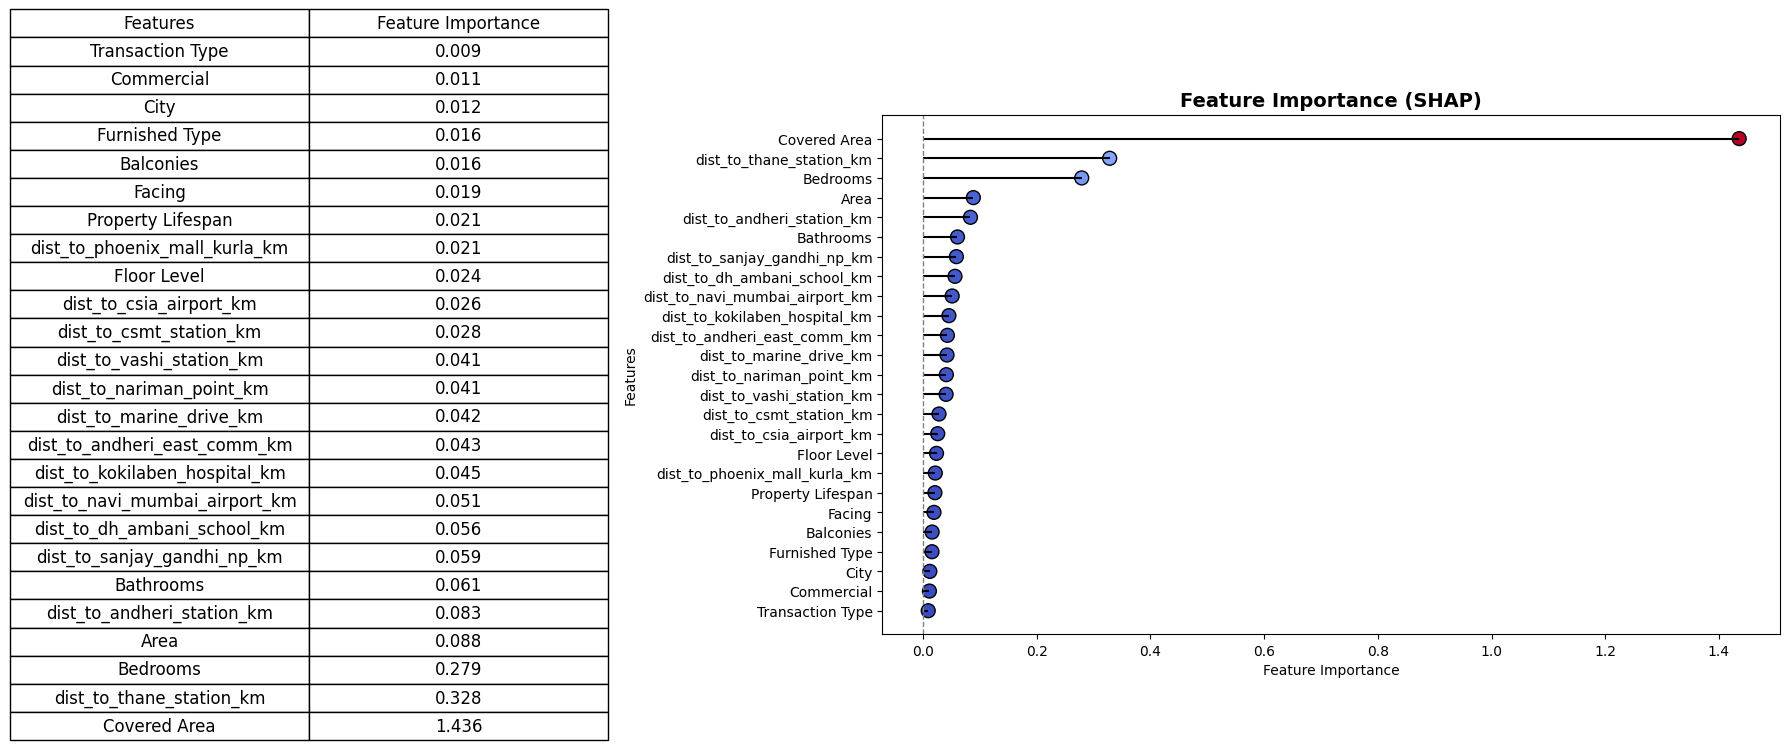

In [44]:
# Top 25
feature_importance_visualization(FI_SHAP[:25], 'SHAP')

--------------

# Summary

### Merge all the individual Feature Importance dataframes

In [45]:
# Merge into single dataframe
final_FI_df = FI_correlation.merge(FI_random_forest,on='Features').merge(FI_gradient_boosting,on='Features').merge(FI_permutation_importance,on='Features').merge(FI_LASSO,on='Features').merge(FI_RFE,on='Features').merge(FI_LR,on='Features').merge(FI_SHAP,on='Features').set_index('Features')
final_FI_df

,FI_corr,FI_Randomforest,FI_Gradientboosting,FI_Permutation,FI_Lasso,FI_RFE,FI_LR,FI_SHAP
Features,,,,,,,,
Covered Area,0.857397,0.749362,0.679226,0.822569,2.037522,0.749362,2.057904,1.435746
Bathrooms,0.758753,0.009227,0.084528,0.007882,0.455529,0.009227,0.460249,0.060558
Bedrooms,0.739477,0.031367,0.058732,0.037161,0.010902,0.031367,-0.069317,0.279090
dist_to_thane_station_km,0.343918,0.059441,0.061919,0.072601,-0.073915,0.059441,0.712645,0.328284
Puja Room,0.242647,0.000700,0.000026,-0.000196,0.099817,0.000700,0.143849,0.002639
...,...,...,...,...,...,...,...,...
City,-0.288900,0.000466,0.001444,0.000097,0.114680,0.000466,-0.233069,0.011876
dist_to_dh_ambani_school_km,-0.314344,0.010115,0.007934,0.002220,0.000000,0.010115,-0.981754,0.056151
dist_to_csmt_station_km,-0.391910,0.007606,0.003220,0.004627,-0.000000,0.007606,24.364184,0.028012


In [46]:
# Normalize the scores
final_fi_df = final_FI_df.divide(final_FI_df.sum(axis=0), axis=1)
final_fi_df

,FI_corr,FI_Randomforest,FI_Gradientboosting,FI_Permutation,FI_Lasso,FI_RFE,FI_LR,FI_SHAP
Features,,,,,,,,
Covered Area,0.041841,0.749362,0.679226,0.813348,0.860687,0.749362,0.568578,0.492617
Bathrooms,0.037028,0.009227,0.084528,0.007794,0.192424,0.009227,0.127162,0.020778
Bedrooms,0.036087,0.031367,0.058732,0.036745,0.004605,0.031367,-0.019151,0.095758
dist_to_thane_station_km,0.016783,0.059441,0.061919,0.071787,-0.031223,0.059441,0.196896,0.112637
Puja Room,0.011841,0.000700,0.000026,-0.000193,0.042165,0.000700,0.039744,0.000906
...,...,...,...,...,...,...,...,...
City,-0.014098,0.000466,0.001444,0.000096,0.048443,0.000466,-0.064394,0.004075
dist_to_dh_ambani_school_km,-0.015340,0.010115,0.007934,0.002195,0.000000,0.010115,-0.271249,0.019266
dist_to_csmt_station_km,-0.019125,0.007606,0.003220,0.004575,-0.000000,0.007606,6.731578,0.009611


#### Final Feature Importances:

In [47]:
# Exclude Feature Importance results from Lineal model feature selection techniques
final_FI_df = final_FI_df[['FI_Randomforest','FI_Gradientboosting','FI_Permutation','FI_RFE','FI_SHAP']].mean(axis=1).sort_values(ascending=False).reset_index()
final_FI_df.columns = ['Features', 'Average Feature Importance']
final_FI_df.style.background_gradient(cmap='coolwarm', subset=['Average Feature Importance'])

,Features,Average Feature Importance
0,Covered Area,0.887253
1,dist_to_thane_station_km,0.116337
2,Bedrooms,0.087544
3,Bathrooms,0.034284
4,Area,0.030338
5,dist_to_andheri_station_km,0.020753
6,dist_to_sanjay_gandhi_np_km,0.019617
7,dist_to_navi_mumbai_airport_km,0.017864
8,dist_to_dh_ambani_school_km,0.017307
9,dist_to_marine_drive_km,0.016009


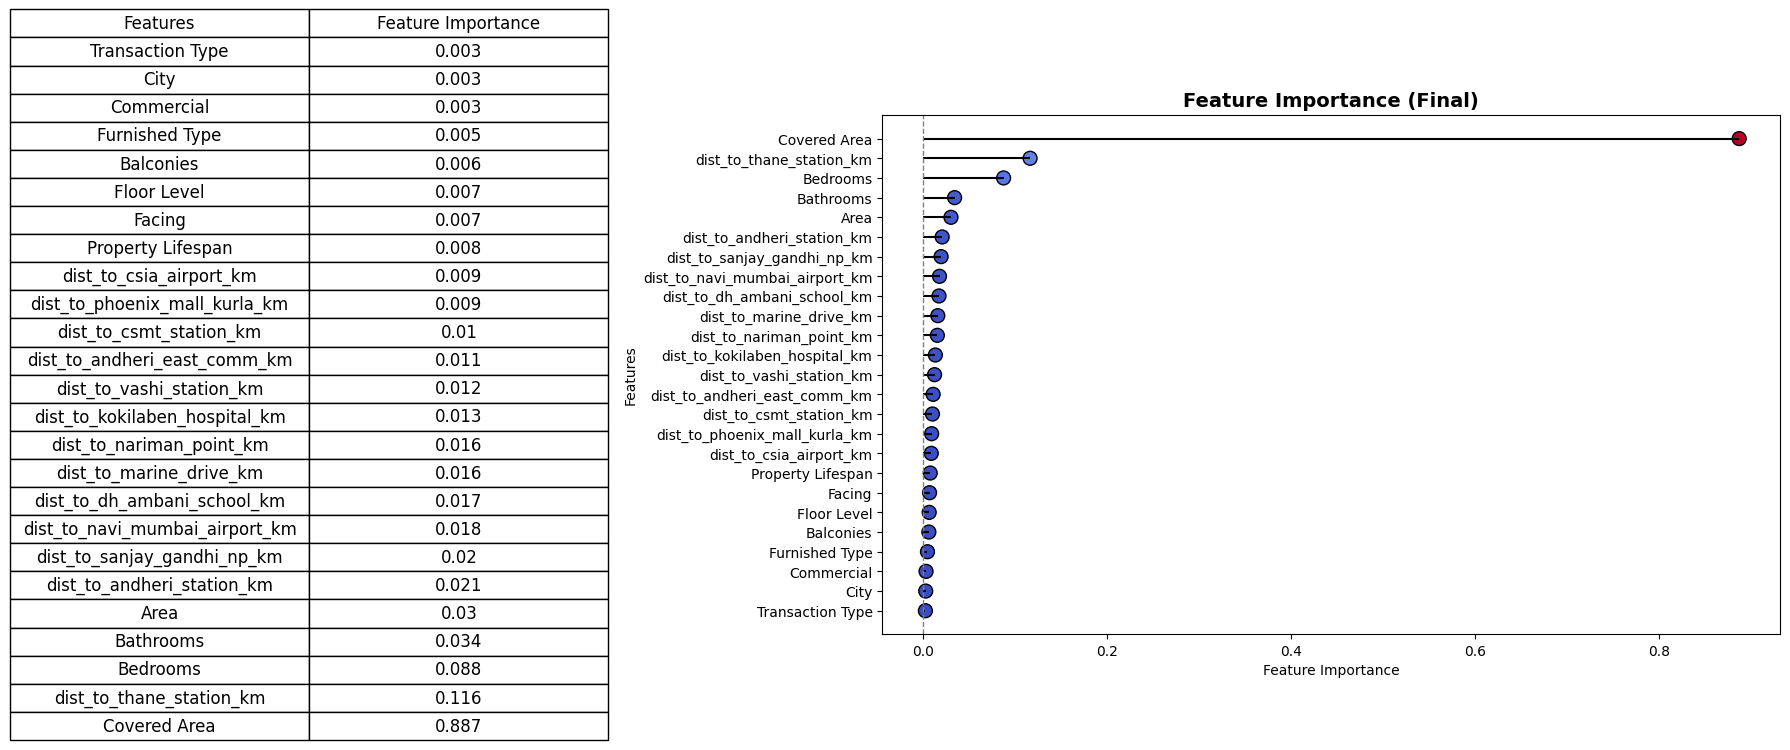

In [49]:
# Top 25
feature_importance_visualization(final_FI_df[:25], 'Final')

##### Defining the Final model's features set = All the top-tier non-amenity features (Everything from Covered Area down to Transaction Type) + Only the top 20 selected amenities

In [61]:
features_to_keep = list(final_FI_df[:46]['Features'])
features_to_drop = list(final_FI_df[46:]['Features'])

#### Investigate for whether these features are not so important for predicting price of the property:

In [62]:
# Independent features
X_label

,Commercial,Covered Area,Furnished Type,Bathrooms,Facing,Transaction Type,Type of Property,City,Bedrooms,Property Lifespan,Balconies,Power Back Up,Lift,Rain Water Harvesting,Club House,Swimming Pool,Gymnasium,Park,Parking,Security,Water Storage,Private Terrace/Garden,Vaastu Compliant,Service/Goods Lift,Air Conditioned,Visitor Parking,Intercom Facility,Maintenance Staff,Waste Disposal,Laundry Service,Internet/Wi-Fi Connectivity,DTH Television Facility,RO Water System,Banquet Hall,Bar/Lounge,Cafeteria/Food Court,Conference Room,Piped Gas,Jogging and Strolling Track,Outdoor Tennis Courts,Mansion,Downtown,Skyline View,Wrap Around Balcony,Island Kitchen Layout,Full Glass Wall,House help accommodation,Concierge Services,Garden View,Marble flooring,Modular Kitchen,Helipad,Private pool,Private Jaccuzi,Mini Cinema Theatre,Golf Course,Infinity Swimming Pool,Pool with temperature control,Sea facing,Skydeck,Earth quake resistant,Theme based Architectures,Health club with Steam / Jaccuzi,Large Clubhouse,Large Open space,Fingerprint Access,Grand Entrance lobby,Private Garage,Fireplace,Wine Cellar,Sky Villa,Water Front,Hilltop,Smart Home,Barbeque space,Kids play area,Library,Puja Room,Study,House Help Room,Store Room,Aerobics Room,Canopy Walk,Coffee Lounge & Restaurants,Dance Studio,Event Space & Amphitheatre,Flower Gardens,Guest Accommodation,Indoor Squash & Badminton Courts,Kids Play Area,Kids Play Pool With Water Slides,Library And Business Centre,Meditation Area,Multipurpose Courts,Recreational Pool,Rentable CommuniPfty Space,Retail Boulevard (Retail Shops),Cycling & Jogging Track,Fire Fighting Equipment,Aesthetically designed landscape garden,Area,Floor Level,dist_to_csia_airport_km,dist_to_thane_station_km,dist_to_andheri_station_km,dist_to_csmt_station_km,dist_to_nariman_point_km,dist_to_andheri_east_comm_km,dist_to_marine_drive_km,dist_to_navi_mumbai_airport_km,dist_to_vashi_station_km,dist_to_sanjay_gandhi_np_km,dist_to_phoenix_mall_kurla_km,dist_to_kokilaben_hospital_km,dist_to_dh_ambani_school_km
0,1.0,763.571943,0.0,2.0,0.0,0.0,0.0,1.0,2,0.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19.0,2.0,32.01,16.86,32.22,45.19,47.27,31.16,45.7,30.01,23.31,27.87,30.90,33.78,34.33
1,0.0,850.000000,0.0,2.0,0.0,0.0,0.0,1.0,2,0.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19.0,2.0,32.01,16.86,32.22,45.19,47.27,31.16,45.7,30.01,23.31,27.87,30.90,33.78,34.33
2,0.0,1050.000000,0.0,2.0,0.0,0.0,0.0,1.0,2,1.0,2.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19.0,1.0,32.01,16.86,32.22,45.19,47.27,31.16,45.7,30.01,23.31,27.87,30.90,33.78,34.33
3,1.0,561.000000,1.0,2.0,0.0,0.0,0.0,1.0,1,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19.0,1.0,32.01,16.86,32.22,45.19,47.27,31.16,45.7,30.01,23.31,27.87,30.90,33.78,34.33
4,0.0,1067.000000,0.0,2.0,2.0,0.0,0.0,1.0,2,0.0,0.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,19.0,2.0,32.01,16.86,32.22,45.19,47.27,31.16,45.7,30.01,23.31,27.87,30.90,33.78,34.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [63]:
# Dependent feature
y_label

0       0.630000
1       0.540000
2       0.900000
3       0.495000
4       0.657000
          ...   
6275    1.460000
6276    1.100000
6277    2.092263
6278    1.870966
6279    1.850000
Name: Price (Crores), Length: 6280, dtype: float64

In [65]:
# Train a Random Forest regressor with all the features present
from sklearn.model_selection import cross_val_score

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Cross-validation
scores = cross_val_score(rf_regressor, X_label, y_label, cv=5, scoring='r2')

# Average score
print('The average R2-score with all the features inclusive:', round(scores.mean(), 2))

The average R2-score with all the features inclusive: 0.79


In [66]:
# Train a Random Forest regressor excluding the non-essential features
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Cross-validation
scores = cross_val_score(rf_regressor, X_label.drop(columns=features_to_drop), y_label, cv=5, scoring='r2')

# Average score
print('The average R2-score with the 7 features excluded:', round(scores.mean(), 2))

The average R2-score with the 7 features excluded: 0.79


##### As evident there is not much effect on the model accuracy when the non-essential columns are dropped. Therefore, we can drop these non-essential features from the dataset permanently.

In [67]:
# Drop non-essential features from the dataframe permanently
training_data.drop(columns=features_to_drop, inplace=True)

# Sample
training_data.sample(5)

,Commercial,Price (Crores),Covered Area,Furnished Type,Bathrooms,Facing,Transaction Type,Type of Property,City,Bedrooms,Property Lifespan,Balconies,Power Back Up,Lift,Club House,Swimming Pool,Park,Parking,Security,Water Storage,Vaastu Compliant,Visitor Parking,Intercom Facility,Maintenance Staff,Internet/Wi-Fi Connectivity,DTH Television Facility,Piped Gas,Jogging and Strolling Track,Puja Room,Study,House Help Room,Store Room,Area,Floor Level,dist_to_csia_airport_km,dist_to_thane_station_km,dist_to_andheri_station_km,dist_to_csmt_station_km,dist_to_nariman_point_km,dist_to_andheri_east_comm_km,dist_to_marine_drive_km,dist_to_navi_mumbai_airport_km,dist_to_vashi_station_km,dist_to_sanjay_gandhi_np_km,dist_to_phoenix_mall_kurla_km,dist_to_kokilaben_hospital_km,dist_to_dh_ambani_school_km
5599,N,1.30,527.631579,Unfurnished,2.0,East,Resale,Apartment,Mumbai,1,10 to 15 years,2.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,Andheri West,Mid rise (5 to 10),6.83,17.13,10.68,14.05,16.12,9.40,14.42,16.37,9.64,21.25,4.72,11.86,5.53
601,N,0.25,395.894891,Unfurnished,1.0,North-East,Resale,Apartment,Thane,1,Less than 5 years,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Dombivli East,Mid rise (5 to 10),27.28,12.47,27.64,40.38,42.46,26.53,40.88,26.07,18.63,24.36,26.11,29.24,29.53
4547,N,14.00,3450.000000,Unfurnished,4.0,East,New Property,Apartment,Mumbai,4,Less than 5 years,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,Lower Parel West,High rise (> 10),3.87,18.35,7.58,13.26,15.16,6.73,13.25,20.76,13.66,19.48,3.24,8.32,1.12
2616,N,0.88,631.000000,Semi-Furnished,2.0,North-East,Resale,Apartment,Thane,1,Less than 5 years,2.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,Thane West,High rise (> 10),15.75,0.08,15.41,31.07,33.10,14.46,31.30,24.28,13.36,13.00,15.15,16.92,18.54
6072,N,2.50,1190.000000,Unfurnished,3.0,South-West,New Property,Apartment,Mumbai,2,New construction,2.0,1,1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0,0,0,0,Andheri East,Low rise (< 5),3.16,14.93,0.92,19.64,21.37,0.62,19.40,25.53,16.05,12.70,5.14,2.58,6.24


In [68]:
# Check shape
training_data.shape

(6280, 47)

In [71]:
# Rearrange the features
training_data = training_data[[
    'City', 'Area', 'Type of Property', 'Transaction Type', 'Property Lifespan', 'Commercial', 'Covered Area', 'Bedrooms', 'Bathrooms', 'Balconies', 'House Help Room', 'Store Room', 'Puja Room', \
    'Study', 'dist_to_csia_airport_km', 'dist_to_thane_station_km', 'dist_to_andheri_station_km', 'dist_to_csmt_station_km', 'dist_to_nariman_point_km', 'dist_to_andheri_east_comm_km', \
    'dist_to_marine_drive_km', 'dist_to_navi_mumbai_airport_km', 'dist_to_vashi_station_km', 'dist_to_sanjay_gandhi_np_km', 'dist_to_phoenix_mall_kurla_km', 'dist_to_kokilaben_hospital_km', \
    'dist_to_dh_ambani_school_km', 'Furnished Type', 'Floor Level', 'Facing', 'Power Back Up', 'Lift', 'Club House', 'Swimming Pool', 'Park', 'Parking', 'Security', 'Water Storage', \
    'Vaastu Compliant', 'Visitor Parking', 'Intercom Facility', 'Maintenance Staff', 'Internet/Wi-Fi Connectivity', 'DTH Television Facility', 'Piped Gas', 'Jogging and Strolling Track', 'Price (Crores)']]

# Sample
training_data.sample(4)

,City,Area,Type of Property,Transaction Type,Property Lifespan,Commercial,Covered Area,Bedrooms,Bathrooms,Balconies,House Help Room,Store Room,Puja Room,Study,dist_to_csia_airport_km,dist_to_thane_station_km,dist_to_andheri_station_km,dist_to_csmt_station_km,dist_to_nariman_point_km,dist_to_andheri_east_comm_km,dist_to_marine_drive_km,dist_to_navi_mumbai_airport_km,dist_to_vashi_station_km,dist_to_sanjay_gandhi_np_km,dist_to_phoenix_mall_kurla_km,dist_to_kokilaben_hospital_km,dist_to_dh_ambani_school_km,Furnished Type,Floor Level,Facing,Power Back Up,Lift,Club House,Swimming Pool,Park,Parking,Security,Water Storage,Vaastu Compliant,Visitor Parking,Intercom Facility,Maintenance Staff,Internet/Wi-Fi Connectivity,DTH Television Facility,Piped Gas,Jogging and Strolling Track,Price (Crores)
3253,Mumbai,Prabhadevi,Apartment,Resale,5 to 10 years,N,420.0,1,1.0,1.0,1,1,1,0,9.65,24.68,12.53,7.49,9.16,12.21,7.20,22.72,18.38,24.87,9.57,12.53,6.37,Semi-Furnished,Mid rise (5 to 10),East,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1.15
3653,Mumbai,Naigaon East,Apartment,Resale,Less than 5 years,N,500.0,1,1.0,2.0,0,0,0,0,8.67,23.47,11.78,8.27,10.07,11.34,8.13,21.74,17.10,24.09,8.41,11.94,5.34,Unfurnished,Low rise (< 5),East,1,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0.32
381,Mumbai,Jogeshwari East,Apartment,Resale,10 to 15 years,N,225.0,1,1.0,1.0,1,1,1,1,6.03,13.50,2.74,22.65,24.36,3.16,22.39,27.34,17.18,9.69,7.67,3.68,9.24,Unfurnished,Mid rise (5 to 10),West,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0.51
3512,Mumbai,Nalasopara West,Apartment,Resale,New construction,N,550.0,1,1.0,2.0,0,0,0,0,3.87,18.35,7.58,13.26,15.16,6.73,13.25,20.76,13.66,19.48,3.24,8.32,1.12,Semi-Furnished,Low rise (< 5),East,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.30


In [72]:
# Export df to a csv file
training_data.to_csv('Output Files//stage_6_property_data.csv', index=False)